R environment

In [ ]:
suppressPackageStartupMessages({
    library(ggplot2)
    library(Seurat)
    library(dittoSeq)
    library(patchwork)
    library(plot1cell)
})

Warning message:
"Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'."


In [ ]:
reference <- readRDS('data/core_GBmap.rds')
reference$Cluster <- reference$annotation_level_3

In [ ]:
###Prepare data for ploting
circ_data <- prepare_circlize_data(reference, scale = 0.75)
set.seed(1234)

In [ ]:
circ_data$Cluster <- factor(x = circ_data$Cluster, 
                                   levels = c(
                                       'Mural cell','Endothelial',
                                       rev(c('Mast', 'Mono','TAM-BDM','TAM-MG','DC')),
                                       rev(c('NK','CD4/CD8','B cell','Plasma B')),
                                       'AC-like','MES-like','OPC-like','NPC-like',
                                       'Astrocyte','Oligodendrocyte','RG', 'OPC','Neuron'
     
     
     ))

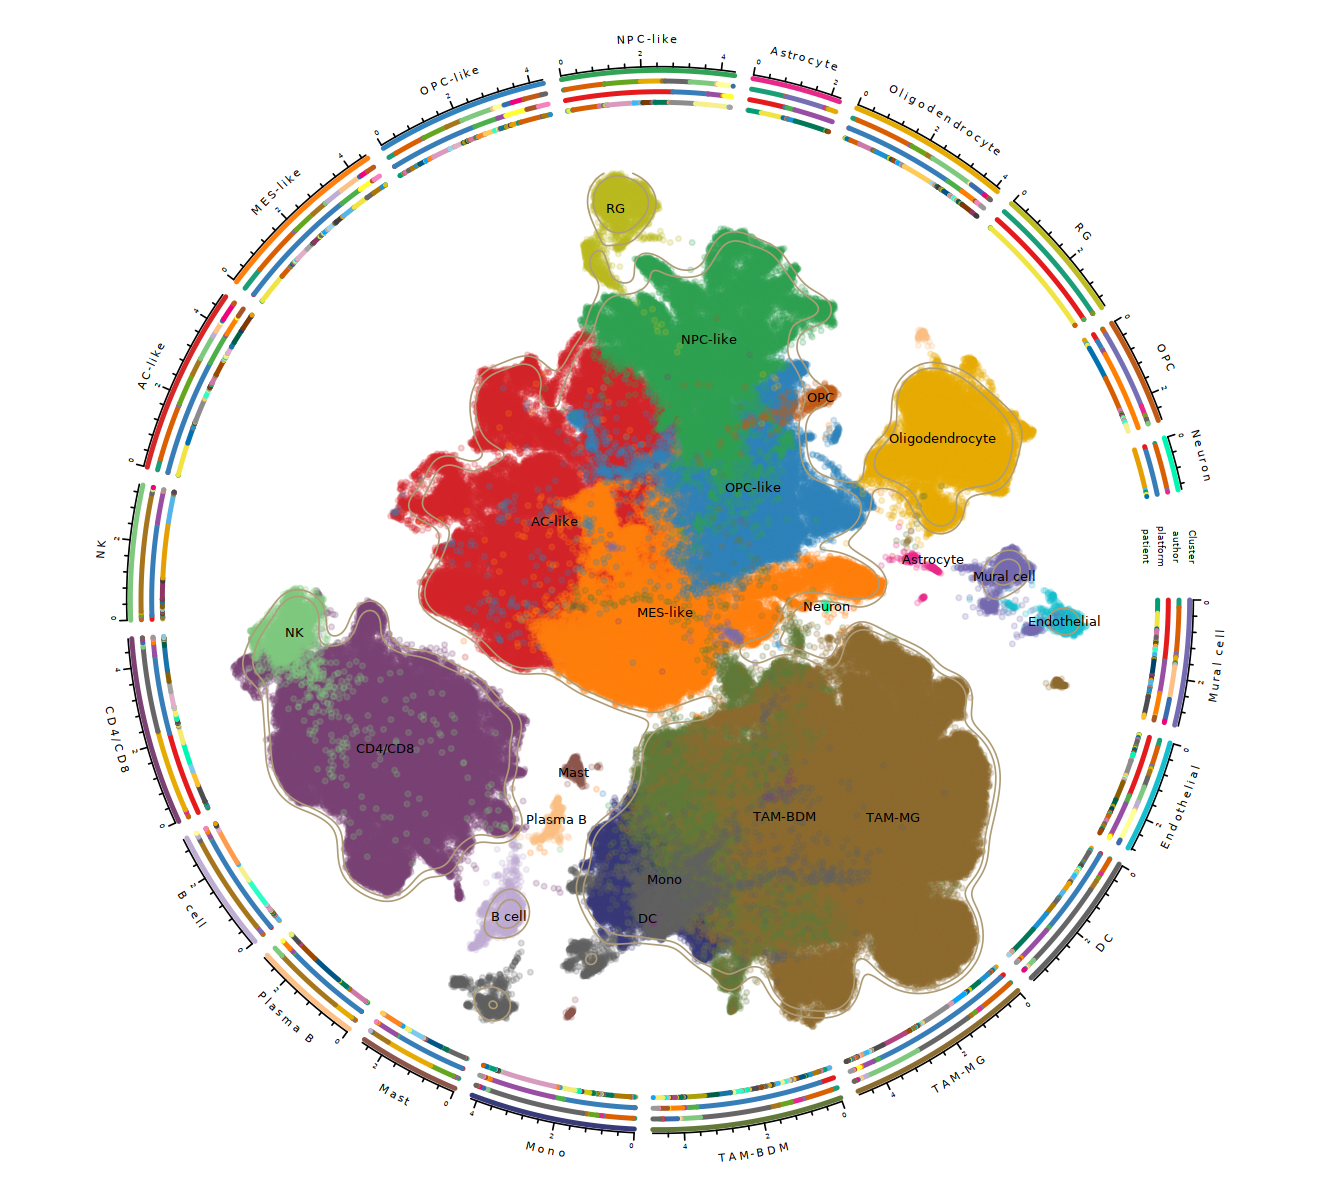

In [ ]:
cluster_colors<- c(
    '#756bb1','#17becf',
    rev(c('#8c564b','#393b79','#637939','#8c6d31','#636363')),
    rev(c('#7fc97f','#7b4173','#beaed4','#fdc086')),
    '#d62728', '#ff7f0e', '#3182bd','#31a354',
    '#e7298a','#e6ab02', '#bcbd22','#bf5b17','#00F6B3'
                )

###plot and save figures
# pdf('circlize_plot.pdf', width = 10, height = 10)
png(filename =  'circlize_plot.png', width = 8, height = 8, units = 'in', res = 300)
plot_circlize(circ_data,do.label = T, pt.size = 0.5, col.use = cluster_colors,
              bg.color = 'white', kde2d.n = 1000, repel = T, label.cex = 0.6)
add_track(circ_data, group = "author", colors = c(RColorBrewer::brewer.pal(8, "Dark2"),
                                                  RColorBrewer::brewer.pal(8, "Accent")), 
          track_num = 2) ## can change it to one of the columns in the meta data of your seurat object
add_track(circ_data, group = "platform",colors = RColorBrewer::brewer.pal(9, "Set1"), 
          track_num = 3) ## can change it to one of the columns in the meta data of your seurat object
add_track(circ_data, group = "patient",colors = dittoColors(), 
          track_num = 4)
dev.off()

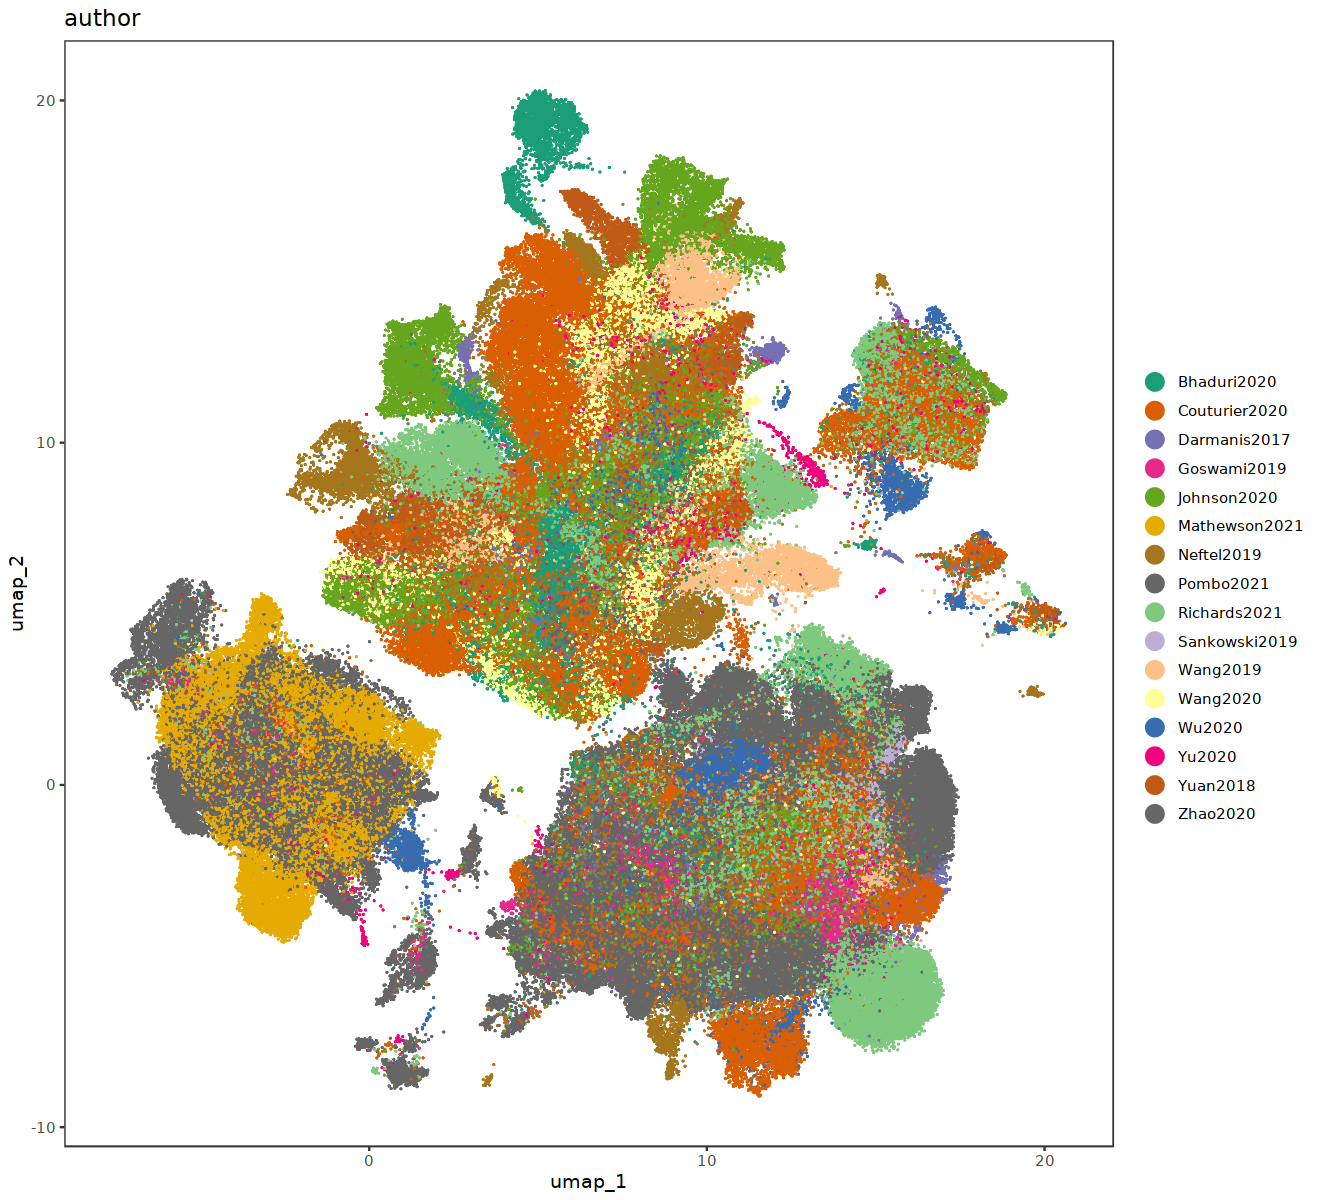

In [ ]:
options(repr.plot.height = 10, repr.plot.width = 11)
dittoDimPlot(reference, color.panel = c(RColorBrewer::brewer.pal(8, "Dark2"),
                                                  RColorBrewer::brewer.pal(8, "Accent")), 
             reduction.use = "umap", var = "author", 
             do.raster = TRUE, order = 'randomize',
             do.label = FALSE, size = 0.5)

In [ ]:
ggsave('figures/author.pdf', width = 8)

Saving 8 x 6.67 in image



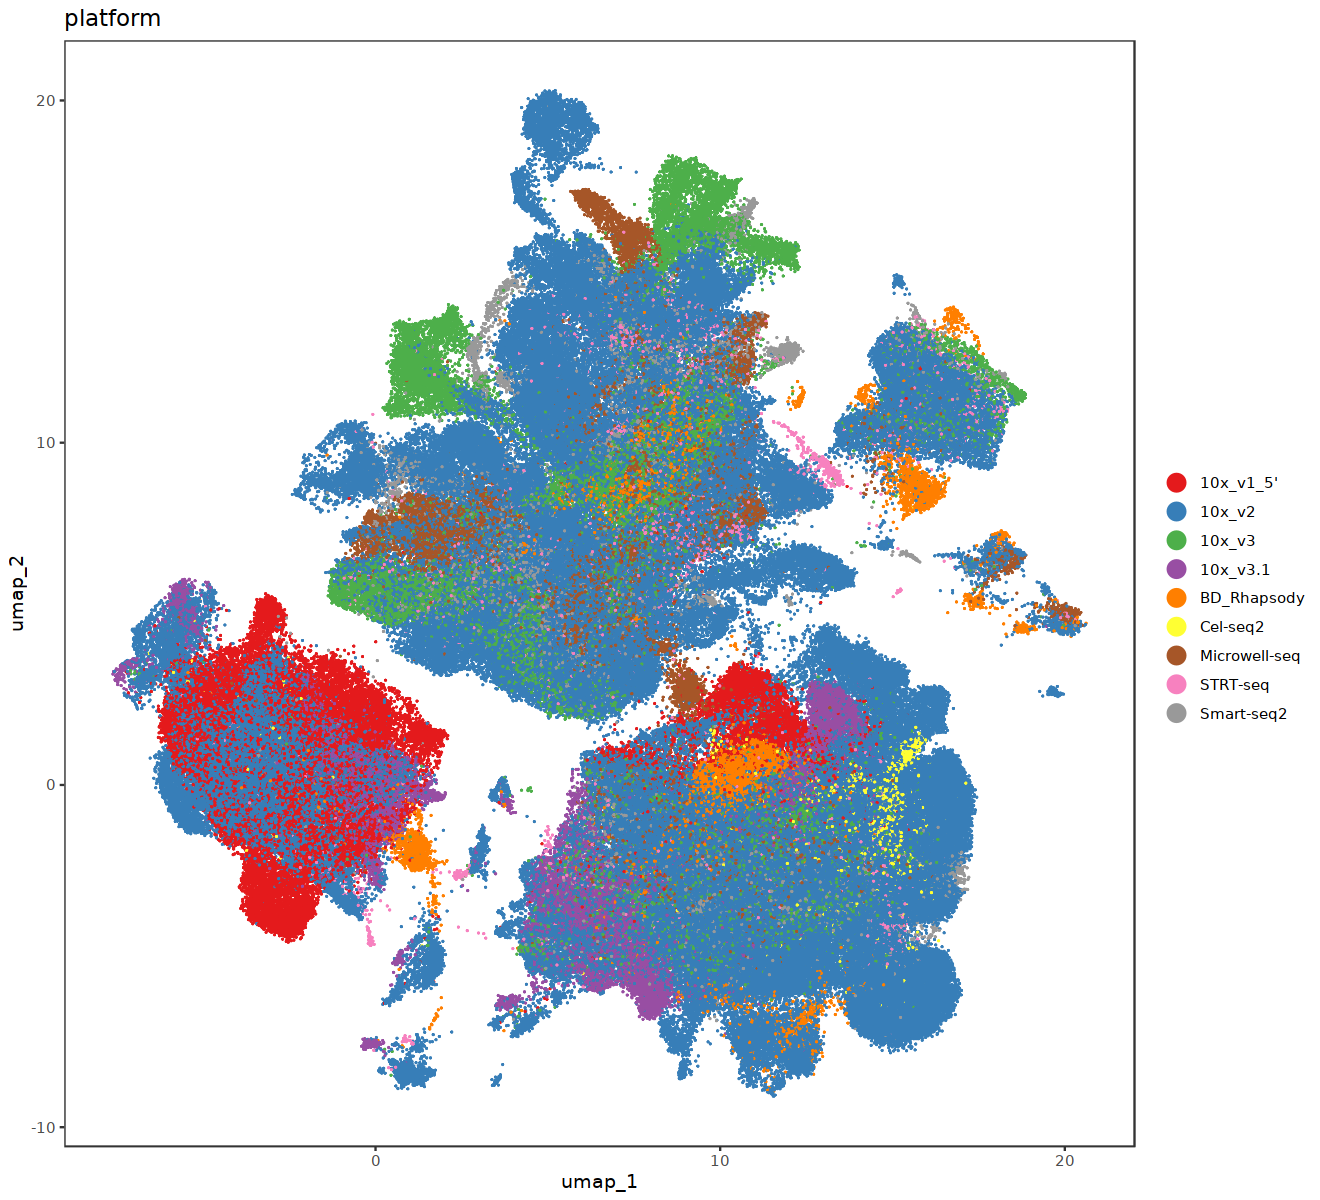

In [ ]:
options(repr.plot.height = 10, repr.plot.width = 11)
dittoDimPlot(reference, color.panel = RColorBrewer::brewer.pal(9, "Set1"), 
             reduction.use = "umap", var = "platform", 
             do.raster = TRUE, order = 'randomize',
             do.label = FALSE, size = 0.5)

In [ ]:
ggsave('figures/platform.pdf', width = 8)

Saving 8 x 6.67 in image



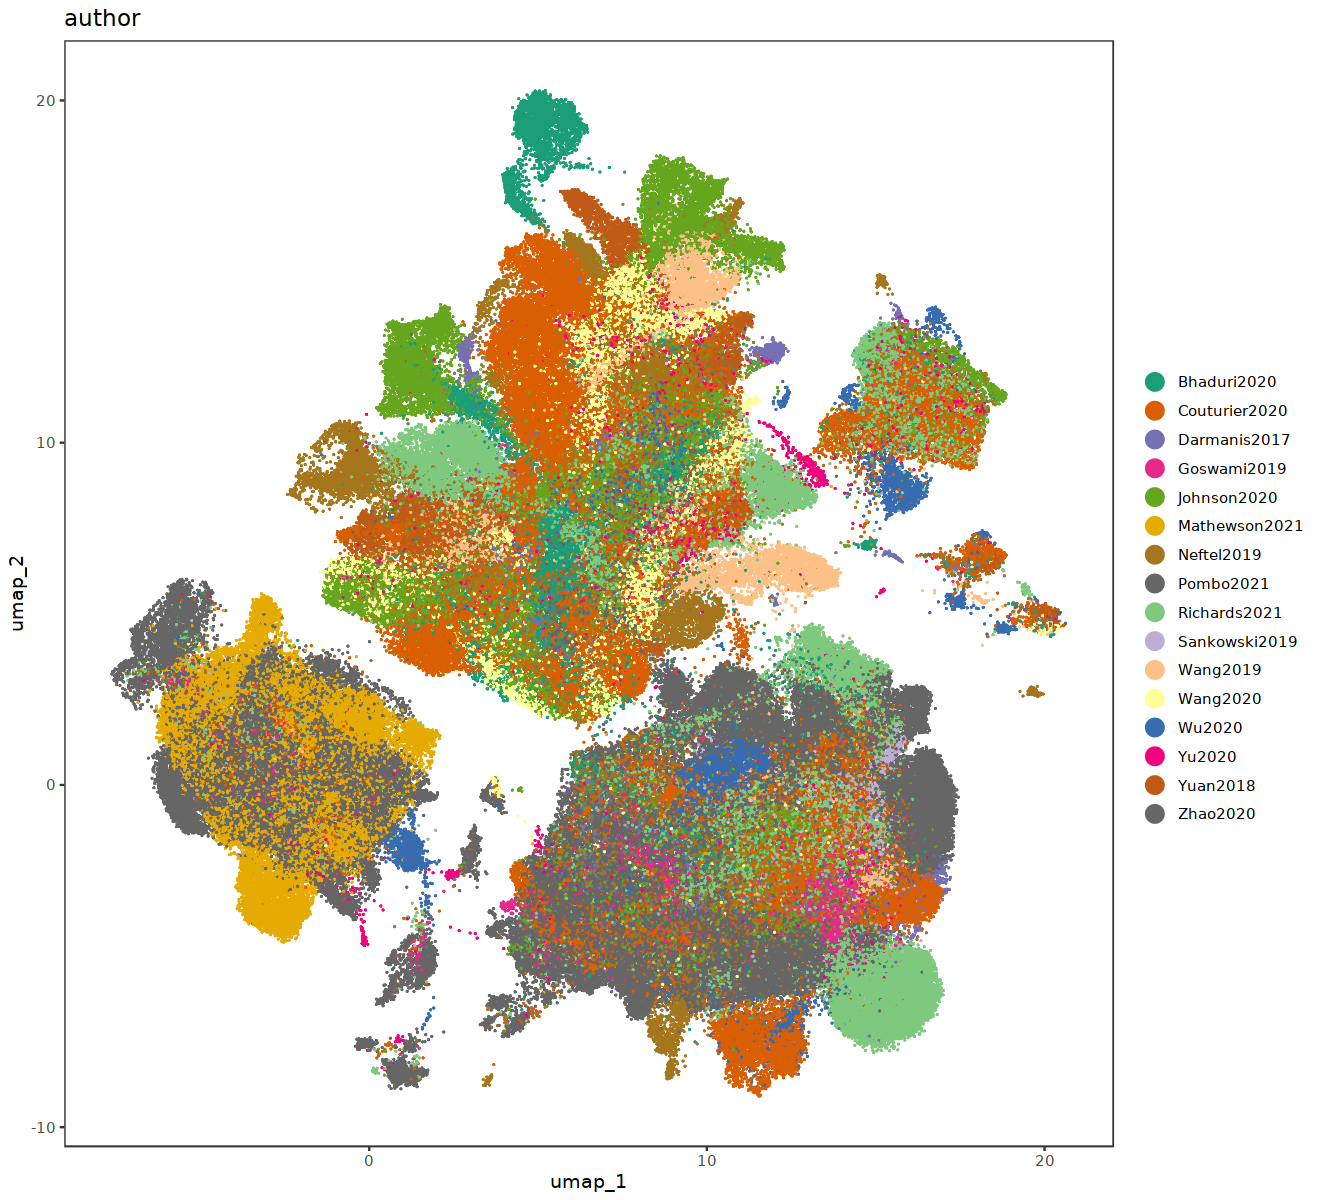

In [ ]:
options(repr.plot.height = 10, repr.plot.width = 11)
dittoDimPlot(reference, color.panel = c(RColorBrewer::brewer.pal(8, "Dark2"),
                                                  RColorBrewer::brewer.pal(8, "Accent")), 
             reduction.use = "umap", var = "author", 
             do.raster = TRUE, order = 'randomize',
             do.label = FALSE, size = 0.5)

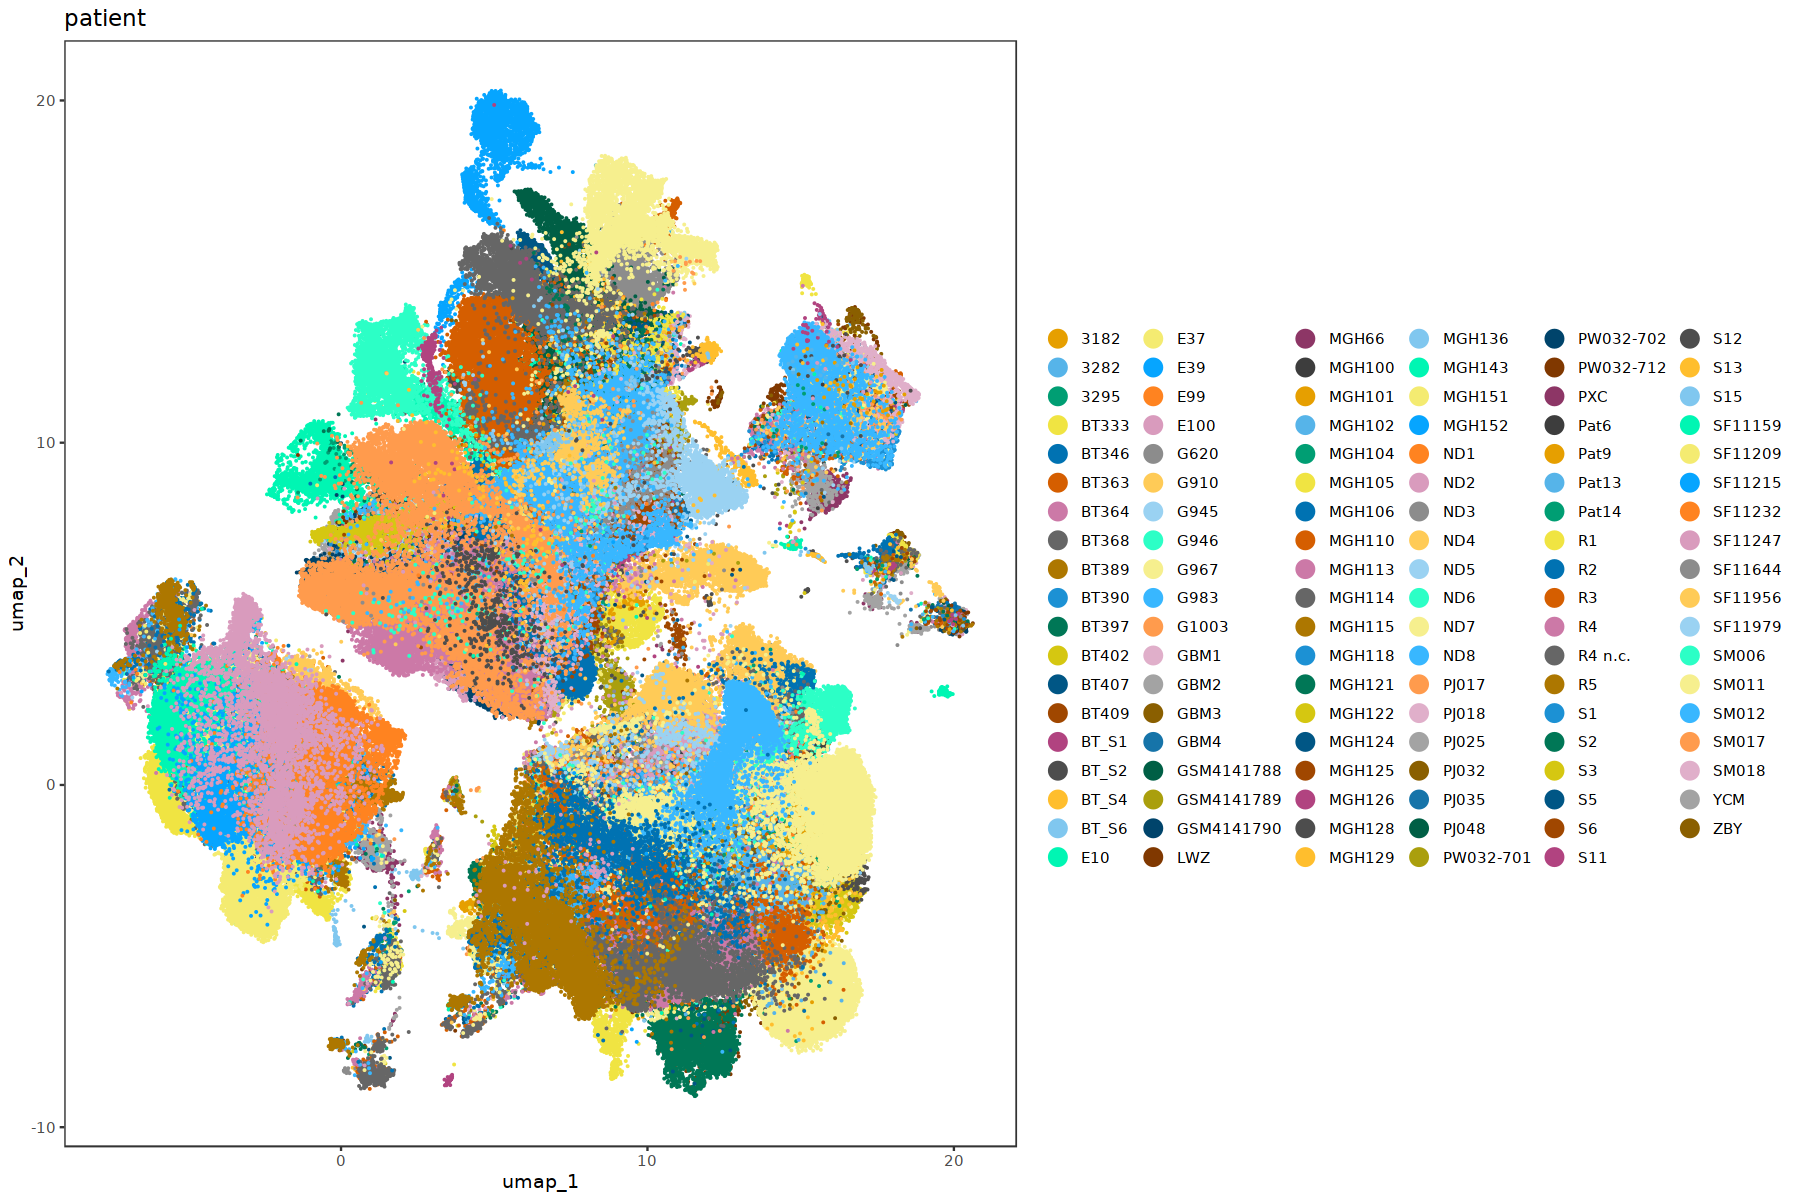

In [ ]:
options(repr.plot.height = 10, repr.plot.width = 15)
dittoDimPlot(reference, 
             reduction.use = "umap", var = "patient", 
             do.raster = TRUE,
             do.label = F, labels.size = 3, size = 0.5)

In [ ]:
ggsave('figures/patient.pdf', width = 15)

In [ ]:
markers.atlas <- c(
    'rna_EGFR', #AC-like
    'MT1X', #MES-like
    'BCAN', #OPC-like
    'CDK4', #NPC-like
    'AQP4', #Asctrocyte
    'PLP1', #Oligo
    'VCAN', #OPC
    'HES1', #RG
    'GAD1', #Neuron
    'S100A9', #Mono
    'TGFBI', #TAM-BDM
    'CX3CR1', #TAM-MG
    'FCER1A', #DC
    'TPSAB1', #mast
    'CD3D', #CD4/CD8
    'NKG7', #NK
    'MS4A1', #B
    'MZB1', #plasma
    'RGS5', #peri
    'VWF' #endothelial
)

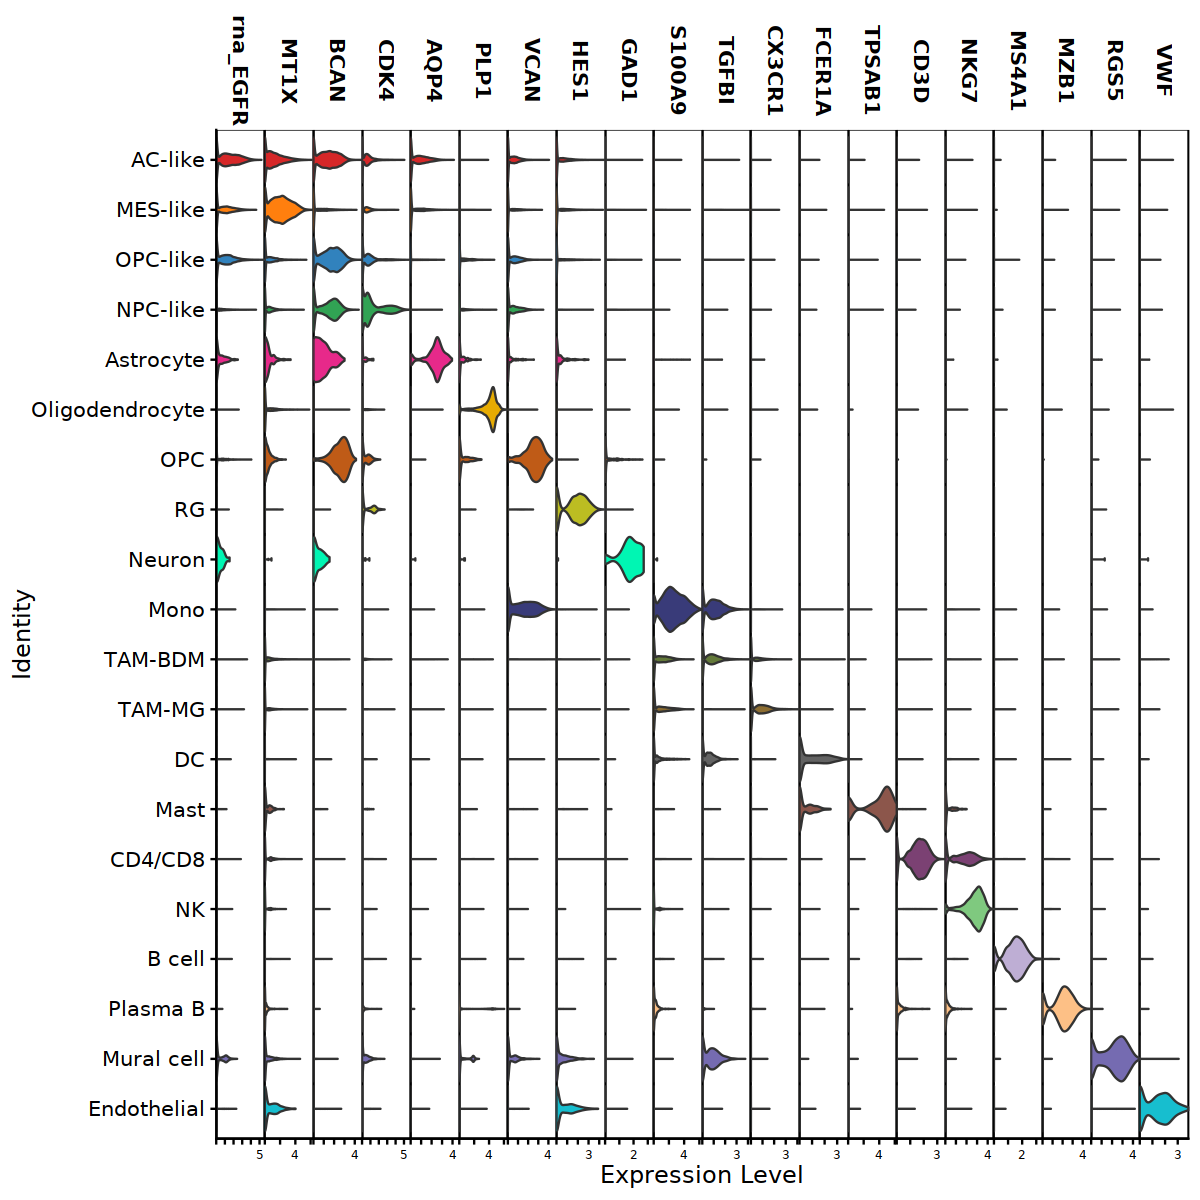

In [ ]:
reference@meta.data$annotation_level_3 <- factor(x = reference@meta.data$annotation_level_3, 
                                   levels = rev(c('AC-like','MES-like','OPC-like','NPC-like',
     'Astrocyte','Oligodendrocyte','OPC','RG','Neuron',
     'Mono','TAM-BDM','TAM-MG','DC','Mast',
     'CD4/CD8','NK','B cell','Plasma B',
     'Mural cell','Endothelial')))
options(repr.plot.height = 10, repr.plot.width = 10)
VlnPlot(reference, markers.atlas, stack = TRUE, flip = FALSE, 
        group.by = 'annotation_level_3', fill.by = 'ident', 
       cols = rev(c('#d62728', '#ff7f0e', '#3182bd','#31a354',
                '#e7298a','#e6ab02', '#bf5b17','#bcbd22','#00F6B3',
                '#393b79','#637939','#8c6d31','#636363','#8c564b',
                '#7b4173', '#7fc97f','#beaed4','#fdc086',
                '#756bb1','#17becf'))) +
        theme(legend.position = "none")

In [ ]:
ggsave('figures/gene_expression.pdf')

Saving 6.67 x 6.67 in image



Final plot was arranged in Illustrator